In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [2]:
def M(U):
    q = (0.9/10000) 
    np = 17
    ns = 17
    mu0 = 1.25663706212e-6
    #todo: den wert iwie halbieren
    return U/(47 *4* 1/(20e-3) * ns * mu0 * q)
def H(Im,Um,U):
    np = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u
    return np/L * Im/Um * U
def Ntheo(d):
    r = 1.5e-2
    return d/(np.pi*r + d)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


======= Teil 4.1 0.94A =====
Koerzitivmagnetisierung: 22.67
Remanenzmagnetisierung: 5.08 e4
Maximale Magnetisierung 16.74 e4


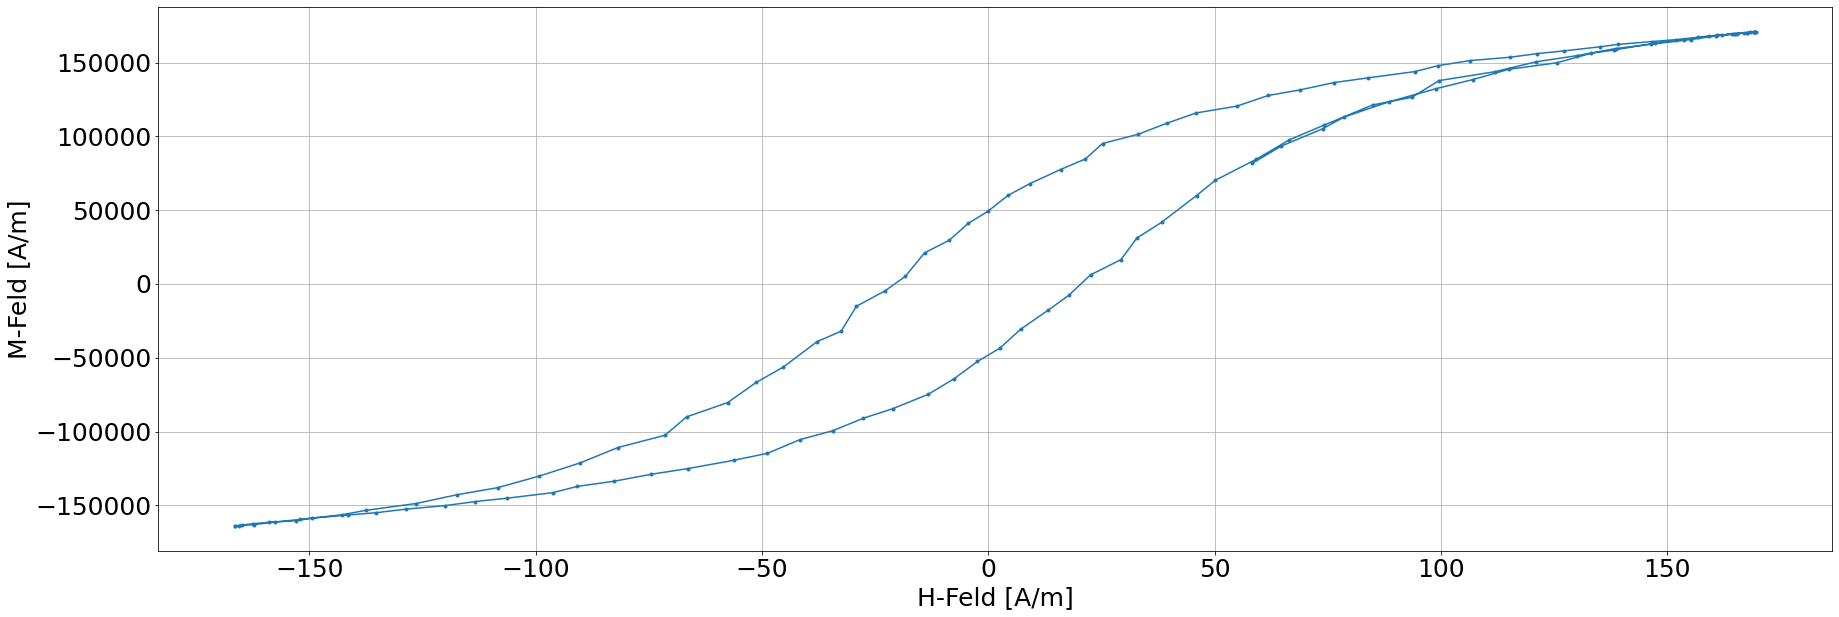

In [3]:
for name in os.listdir("Daten"):
    if not("0.94" in name):
        continue


    if "m" in name:
        Im = 1e-3*float(name.split(" ")[-1][:-2])
    else:
        Im =float(name.split(" ")[-1][:-1])
    
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    #plt.xlim(-0.25,0.25)
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[1]))
        yv.append(M(float(vals[0])))
    xv = np.array(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    xv = list(xv)

    
    plt.plot(xv,yv,marker=".",label="Messdaten für 0.94A")
    plt.xlabel("H-Feld [A/m]")
    plt.ylabel("M-Feld [A/m]")
    file.close()
    

    x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]
    x_yg0 = [x for i,x in enumerate(xv) if yv[i] > 0]
    
    y_xs0 = [y for i,y in enumerate(yv) if xv[i] < 0]
    y_xg0 = [y for i,y in enumerate(yv) if xv[i] > 0]
    
    print("=======",name,"=====")
    #print("Koerzitivmagnetisierung:",y_xs0)
    try:

        print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
    except:
        try:

            print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
        except:
            try:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
            except:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
    
    try:
        print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    except:
        try:
            print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
        except:
            try:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
            except:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    print("Maximale Magnetisierung",round(1/2*(abs(min(yv))+max(yv))/10000,2),"e4")
    
    x_abs = abs(np.array(xv))
    y_abs = abs(np.array(yv))
    #plt.plot([0,0],[min(yv),max(yv)],color="green")
    #plt.plot([min(xv),max(xv)],[0,0],color="green")
    #plt.title(name)
    plt.grid(True)
plt.savefig("..\..\Images\Teil4.1.png")

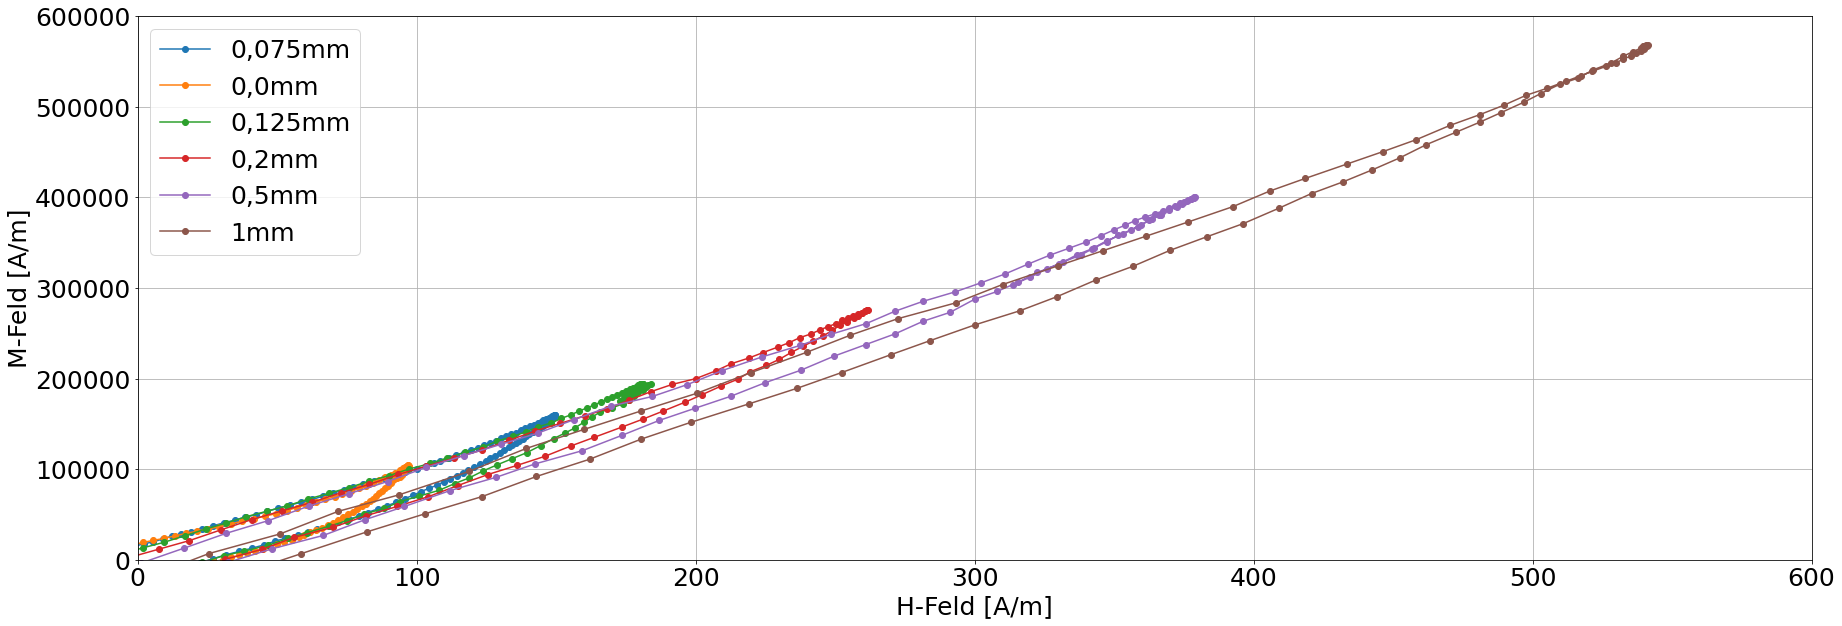

In [52]:
Ns = []
Nt = []
sb = []
ref = 0
Hmax = []
Mmax = []

plt.figure(figsize=(30,10))
for name in os.listdir("Daten asim"):
    
    if "0.94" in name or "0,94" in name:
        continue
    #Im = 0.94
    Im = float(name.replace(",",".").split(" ")[-1][:-1])

    file = open("Daten asim/"+name)
    lines = file.readlines()
    xv,yv = [],[]

    for i,line in enumerate(lines):
        if i < 3:
            continue
        vals = line[:-1].split("\t")
        xv.append((float(vals[1])))
        yv.append(M(float(vals[0])))
    xv = np.array(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    plt.plot(xv,yv,label=name.split(" ")[0],marker="o")
    plt.xlabel("H-Feld [A/m]")
    plt.ylabel("M-Feld [A/m]")
    plt.legend()
    file.close()
    plt.xlim(0,600)
    plt.ylim(0,600000)
    plt.grid(True)
    Mmax.append(max(xv))
    Hmax.append(max(yv))
    if "0mm" in name:
        ref = max(yv)
    sb.append(float(name.split(" ")[0][:-2].replace(",",".")))
plt.savefig("..\..\Images\Teil4.2_unsereTrashdaten_panda.png")

In [40]:
Ns = []
for i in range(len(Hmax)):
    print(ref,Hmax[i])
    Ns.append((Hmax[i]-ref)/Mmax[i])

104123.26265652785 159572.81270740644
104123.26265652785 104123.26265652785
104123.26265652785 194521.69057498037
104123.26265652785 275689.72218406823
104123.26265652785 400084.7757935302
104123.26265652785 568509.7450430787


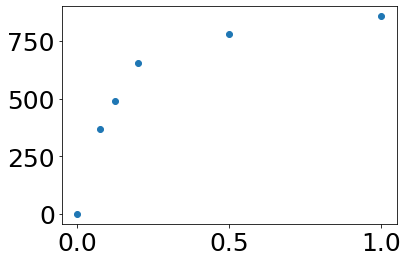

In [43]:
plt.scatter(sb,Ns,marker="o",linestyle="-")
#plt.plot(sb,Nt,marker="o")

In [7]:
Nt

[]

In [8]:
Ns

[0.0,
 26.831505116874542,
 18.600068256575305,
 37.628242113308204,
 41.943053523228144,
 36.88704849579827,
 71.45965476016558]

'1'